In [1]:
from sqlalchemy import create_engine
from sqlalchemy import text
import pandas as pd
from datetime import date


host = "127.0.0.1:3306"
user="root"
passwd="1234"
database="trade"



engine = create_engine('mysql+mysqlconnector://' + user + ':' + passwd + '@' + host + '/' + database)

SQL_Query = text(f'''SELECT product.product_name, category.category, sale.sum, sale.quantity, 
                segment.segment,city.city, state.state, worker.name, worker.surname
                FROM trade.sale_product as sale
                LEFT JOIN trade.segment as segment
                ON segment.id=sale.id_segment
                LEFT JOIN trade.city as city
                ON city.id=sale.id_city
                LEFT JOIN trade.state as state
                ON state.id=city.id_state
                LEFT JOIN trade.product as product
                ON product.id=sale.id_product
                LEFT JOIN trade.category as category
                ON category.id=product.id_category
                LEFT JOIN trade.worker as worker
                ON worker.id=sale.id_worker
            ;''')
#SQL_Query = pd.read_sql_query(''' '''
     
     
with engine.begin() as conn:  # TRANSACTION
    df =  pd.read_sql_query(SQL_Query, conn)
  
conn.close()

In [2]:
df.head()

,product_name,category,sum,quantity,segment,city,state,name,surname
0,Bookcases,Furniture,261.960,2,Consumer,Henderson,Kentucky,Sara,Perez
1,Chairs,Furniture,731.940,3,Consumer,Henderson,Kentucky,Juan,Gonzalez
2,Labels,Office Supplies,14.620,2,Corporate,Los Angeles,California,Sara,Lopez
3,Tables,Furniture,957.578,5,Consumer,Fort Lauderdale,Florida,Pablo,Perez
4,Storage,Office Supplies,22.368,2,Consumer,Fort Lauderdale,Florida,Sara,Lopez


In [3]:
df_product=df.groupby(['product_name']).agg({'quantity':sum,'sum':sum}).reset_index()
df_product.sort_values(by=["sum"],inplace=True)
df_product

,product_name,quantity,sum
8,Fasteners,914,3024.2800
10,Labels,1400,12486.3120
7,Envelopes,906,16476.4020
2,Art,3000,27118.7880
15,Supplies,647,46673.5440
12,Paper,5178,78479.2060
9,Furnishings,3563,91705.1620
1,Appliances,1729,107532.1610
4,Bookcases,868,114880.0114
6,Copiers,234,149528.1000


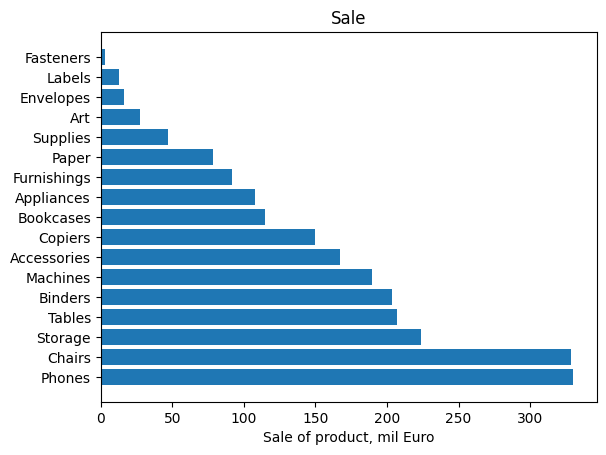

In [4]:
import matplotlib.pyplot as plt


plt.rcdefaults()
fig, ax = plt.subplots()

product = df_product.index
y = df_product["product_name"]
x = df_product["sum"]/1000

ax.barh(y, x, align='center')
ax.set_yticks(y)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Sale of product, mil Euro')
ax.set_title('Sale')

plt.show()

In [29]:
df_cat_seg=df.groupby(['segment','category']).agg({'quantity':sum,'sum':sum}).reset_index()
df_cat_seg.sort_values(by=["sum"],inplace=True)
df_cat_seg

,segment,category,quantity,sum
2,Consumer,Technology,3597,406399.9910
0,Consumer,Furniture,4166,391048.2888
1,Consumer,Office Supplies,11758,363952.1420
5,Corporate,Technology,2095,246450.0750
4,Corporate,Office Supplies,7018,230676.4510
3,Corporate,Furniture,2495,229019.7912
8,Home Office,Technology,1247,183304.0730
7,Home Office,Office Supplies,4130,124418.4420
6,Home Office,Furniture,1367,121930.6984


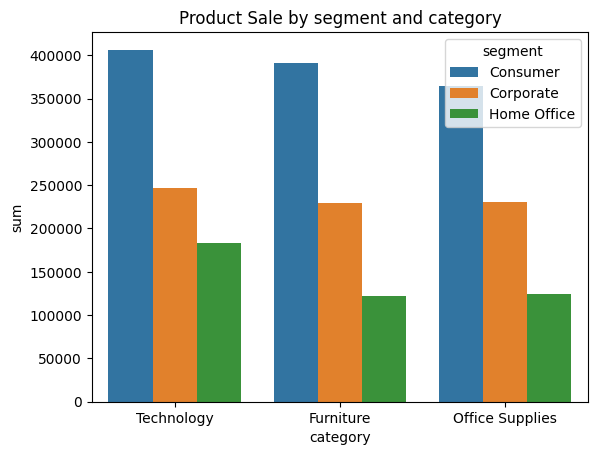

In [40]:
import seaborn as sns

x=df_cat_seg["category"]
y=df_cat_seg["sum"]
hue=df_cat_seg["segment"]

ax=sns.barplot(x="category", y="sum", hue="segment", data=df_cat_seg).set(title='Product Sale by segment and category')


In [41]:
#the best seller by state
df_top_state=df.groupby(['state']).agg({'quantity':sum,'sum':sum}).reset_index()
df_top_state.sort_values(by=["sum"], ascending=False,inplace=True)
top_state=df_top_state[0:5]["state"].to_list()
df_top=df[df["state"].isin(top_state)]
df_top_state.head()

,state,quantity,sum
3,California,7924,472903.6450
30,New York,4071,302004.9650
41,Texas,3568,164316.7874
44,Washington,1934,140933.1720
36,Pennsylvania,2118,115300.5240


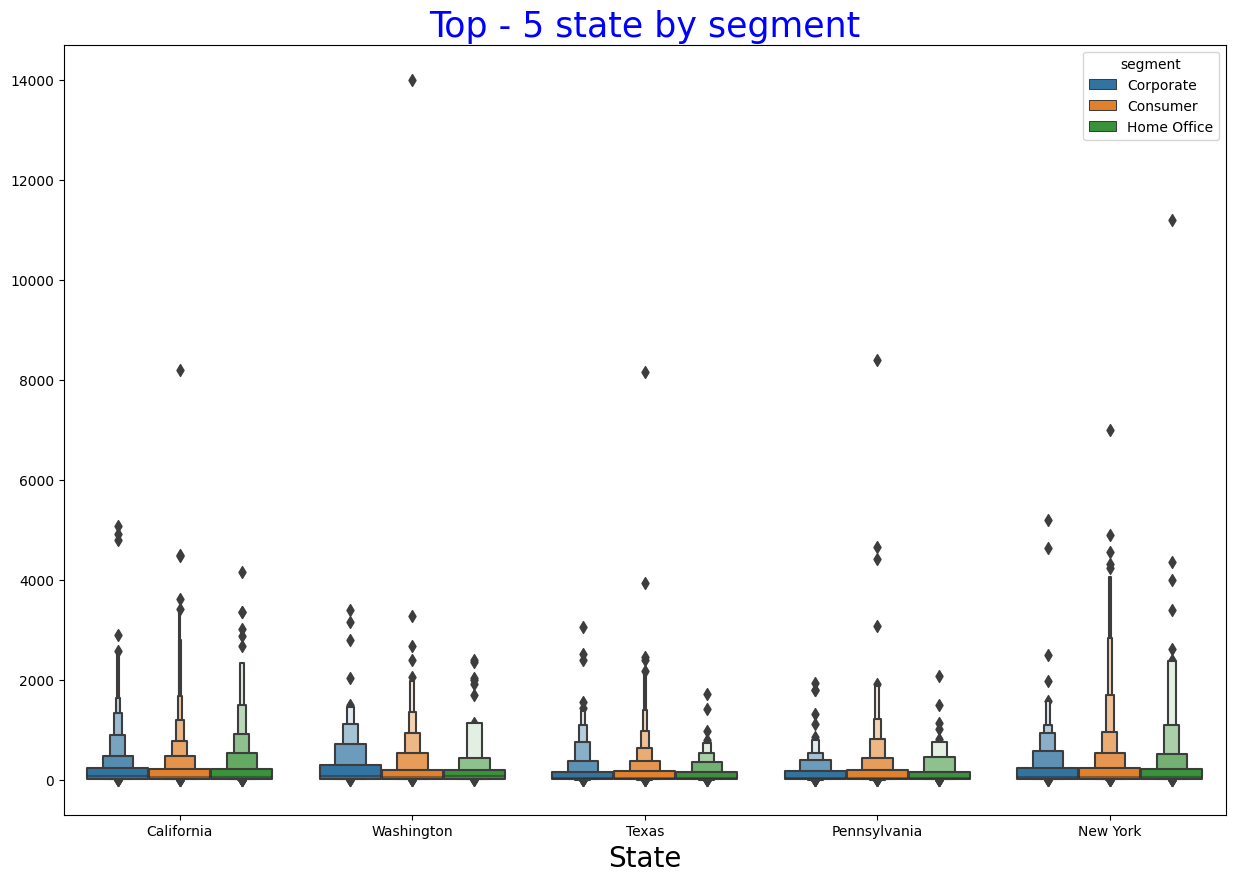

In [44]:
fig, ax = plt.subplots(figsize=(15,10))

ax1=sns.boxenplot(x="state", y="sum", hue="segment", data=df_top)
ax.set_title('Top - 5 state by segment', fontsize = 25, color="blue")
ax.set_ylabel('',fontsize = 20)
ax.set_xlabel('State',fontsize = 20)
plt.show()